### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from jupyter_core.version import pattern
from pandas import value_counts

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data = data.drop(columns='car')
data = data.dropna(axis="rows")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

Here we chose to drop the entirety of the "car" column as it contains very little data. We also drop all rows that have NaN values in one or more fields. We now have 12079 rows of data with no missing values.

In [7]:
data.shape

(12079, 25)

4. What proportion of the total observations chose to accept the coupon?



In [8]:
percent_accepted = (data.loc[data['Y']==1]['Y'].count() / len(data['Y'])) * 100 #divide accepted coupons by total coupons
print(f'Percent of total coupons accepted: {percent_accepted:.2f}%')

Percent of total coupons accepted: 56.93%


<function matplotlib.pyplot.show(close=None, block=None)>

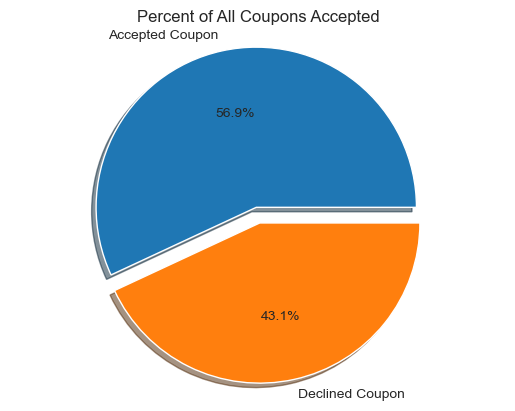

In [9]:
plt.pie(data['Y'].value_counts(),labels=['Accepted Coupon','Declined Coupon'],explode=(0,0.1),autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Percent of All Coupons Accepted')
plt.show

Of all the coupon offers, 56.93 percent of customers chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

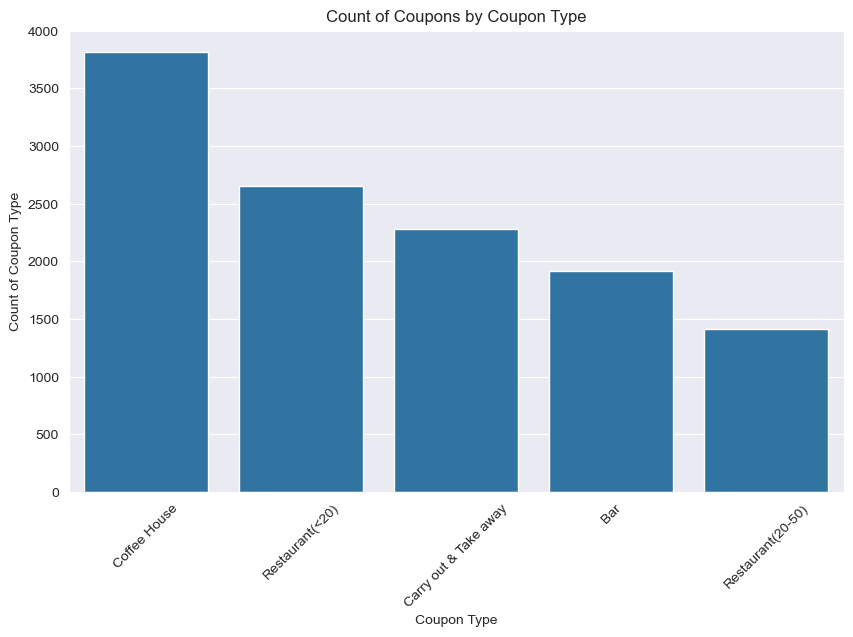

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['coupon'].value_counts().index,y=data['coupon'].value_counts().values)
plt.title('Count of Coupons by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count of Coupon Type')
plt.xticks(rotation=45);

It is clear from this plot that Coffee House coupons are offered more often than the other types of coupons, with relatively expensive restaurants coming up last.

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

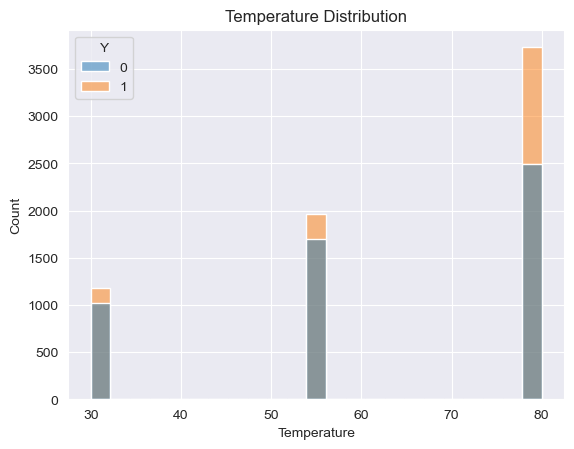

In [11]:
sns.histplot(data,x='temperature',hue='Y')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')


Here we can see that more coupons are offered during warm weather than during cool or cold weather temperatures.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [53]:
bar_df = data[data['coupon']=="Bar"]
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [41]:
bar_coupon_accepted_ratio = (bar_df[bar_df['Y']==1]['Bar'].count() / bar_df['Bar'].count()) * 100
print(f'Bar coupons accepted: {bar_coupon_accepted_ratio:.2f}%')

Bar coupons accepted: 41.19%


Customers accepted Bar specific coupons at a rate of 41.19%. We get that ratio by dividing the number of customers who accepted a Bar coupon by the total number of bar coupons offered.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [84]:
bar_patrons = bar_df[['Bar','Y']]
bar_patrons.loc[bar_df['Bar'].isin(['never','less1','1~3']),'Bar'] = "Three or Less"
bar_patrons.loc[bar_df['Bar'].isin(['4~8','gt8']),'Bar'] = "More than Three"
bar_patrons = bar_patrons.groupby('Bar').agg({'Bar':'size','Y':'sum'})
bar_patrons.rename(columns={'Bar':'Coupons Offered','Y':'Coupons Accepted'},inplace=True)

bar_patrons['Acceptance Rate'] = bar_patrons['Coupons Accepted'] / bar_patrons['Coupons Offered'] * 100
bar_patrons = bar_patrons.reset_index()
bar_patrons

,Bar,Coupons Offered,Coupons Accepted,Acceptance Rate
0,More than Three,193,147,76.165803
1,Three or Less,1720,641,37.267442


Text(0.5, 0, 'Number of Visits per Month')

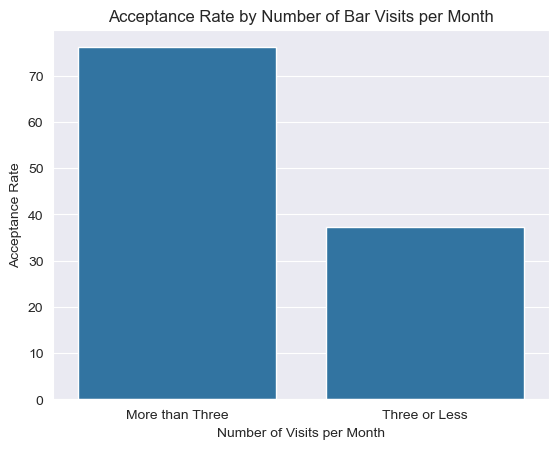

In [87]:
sns.barplot(bar_patrons,x='Bar',y='Acceptance Rate')
plt.title('Acceptance Rate by Number of Bar Visits per Month')
plt.xlabel('Number of Visits per Month')

In [43]:
three_or_fewer = bar_df[bar_df['Bar'].isin(['never','less1','1~3'])]
more_than_three = bar_df[bar_df['Bar'].isin(['4~8','gt8'])]
acc_rate_three_or_fewer = three_or_fewer['Y'].mean() * 100
acc_rate_more_than_three = more_than_three['Y'].mean() * 100
print(f'Less than three times per month: {acc_rate_three_or_fewer:.2f}%')
print(f'More than three times per month: {acc_rate_more_than_three:.2f}%')


Less than three times per month: 37.27%
More than three times per month: 76.17%


People who go to bars more than three times a month are much more likely to accept a bar coupon than those who go to a bar three times or less per month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [44]:
older_than_25_accepted = bar_df.query('(age != "below21" and age != "21") and (Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and Y == 1').value_counts().sum()
older_than_25_declined = bar_df.query('(age != "below21" and age != "21") and (Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and Y == 0').value_counts().sum()
group_acceptance_rate = older_than_25_accepted / (older_than_25_declined + older_than_25_accepted) * 100
print(f'Group acceptance: {group_acceptance_rate:.2f}%')

Group acceptance: 68.98%


Drivers who go to a bar more than once a month and are over the age of twenty-five accept Bar Coupons at a rate of 68.98% versus the rest of the population who accepts Bar Coupons at a rate of 41.19%. This acceptance rate is lower than the overall population of people who go to bars three or more times a month because we wind up ignoring the 21-24 year old demographic which accounts for a significant amount of coupon acceptance.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [47]:
more_than_once_per_month_passenger = bar_df.query('(passanger != "Kid(s)" and passanger != "Alone") and (Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and occupation != "Farming Fishing & Forestry" and Y == 1')['Y'].count()
more_than_once_per_month_no_kid_passenger = bar_df.query('(passanger != "Kid(s)" and passanger != "Alone") and (Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and occupation != "Farming Fishing & Forestry" and Y == 0')['Y'].count()
group_acceptance_rate = more_than_once_per_month_passenger / (more_than_once_per_month_no_kid_passenger + more_than_once_per_month_passenger) * 100
print(f'Group acceptance rate: {group_acceptance_rate:.2f}%')


Group acceptance rate: 71.43%


Drivers with passengers who aren't children and don't work in farming, fishing, or forestry have a coupon acceptance rate of 71.43% compared with the rest of the population acceptance rate of 41.19%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



We'll take a look at the third category, drivers who "go to cheap restaurants more than 4 times a month and income is less than 50K."

In [48]:
group_one = bar_df.query('(RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8") and (income=="Less than $12500" or income=="$12500 - $24999" or income=="$25000 - $37499" or income=="$37500 - $49999")')
group_one_acceptance = (group_one.loc[group_one['Y']==1]['Y'].count() / len(group_one['Y'])) * 100
print(f'Group acceptance rate: {group_one_acceptance:.2f}%')




Group acceptance rate: 45.65%


The acceptance rate for drivers that eat at "cheap" restaurants and who make less than $50K a year at 45.65% is not too dissimilar from the overall bar coupon acceptance rate of 41.19%.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Findings**
- Drivers who frequent bars more than three times a month have a high propensity to accept bar coupons
- Drivers below the age of 25 have a higher propensity to accept bar coupons than those older than 25
- Drivers with adult passengers are more likely to accept a bar coupon than those with a child in the car
- Drivers who eat a "cheap" restaurants and make less than $50K per year don't vary significantly from the population at large in accepting bar coupons.
- Working in Farming, Fishing or Agriculture doesn't appear to have an impact on acceptance rates.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

Exploration of Coffe House Coupons

In [18]:
coffee_df = data[data['coupon']=='Coffee House']

In [19]:
accepted_coffee_coupon = coffee_df[coffee_df['Y']==1].value_counts().sum()
total_coffee_coupon = len(coffee_df['Y'])

coffee_coupon_acceptance_rate = accepted_coffee_coupon / total_coffee_coupon * 100
print(f'The overall acceptance rate for coffee coupons is {coffee_coupon_acceptance_rate:.2f}%')

The overall acceptance rate for coffee coupons is 49.63%


<function matplotlib.pyplot.show(close=None, block=None)>

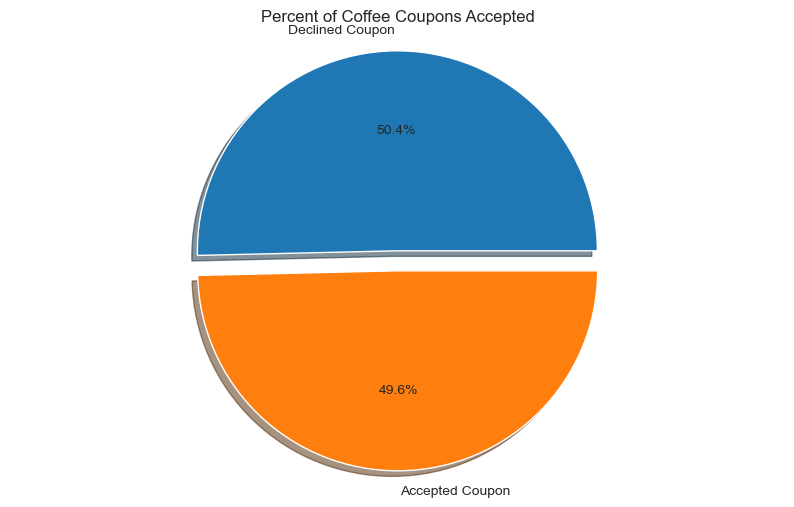

In [20]:
plt.figure(figsize=(10,6))
plt.pie(coffee_df['Y'].value_counts(),labels=['Declined Coupon','Accepted Coupon'],explode=(0,0.1),autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Percent of Coffee Coupons Accepted')
plt.show

Customers accepted Coffee House specific coupons at a rate of 49.63%, less than the overall coupon acceptance rate of 56.93%

Let's see if frequency of visiting coffee bars has a bearing on coupon acceptance rates

In [21]:
coffee_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [49]:
three_or_fewer = coffee_df[coffee_df['CoffeeHouse'].isin(['never','less1','1~3'])]
more_than_three = coffee_df[coffee_df['CoffeeHouse'].isin(['4~8','gt8'])]
acc_rate_three_or_fewer = three_or_fewer['Y'].mean() * 100
acc_rate_more_than_three = more_than_three['Y'].mean() * 100
print(f'Less than three times per month: {acc_rate_three_or_fewer:.2f}%')
print(f'More than three times per month: {acc_rate_more_than_three:.2f}%')

Less than three times per month: 44.59%
More than three times per month: 67.26%


In [23]:
temps = coffee_df.groupby(['temperature','Y']).count().reset_index() #looking at the affect of temp on coupon acceptance
temps

,temperature,Y,destination,passanger,weather,time,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,30,0,167,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
1,30,1,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
2,55,0,668,668,668,668,668,668,668,668,...,668,668,668,668,668,668,668,668,668,668
3,55,1,551,551,551,551,551,551,551,551,...,551,551,551,551,551,551,551,551,551,551
4,80,0,1087,1087,1087,1087,1087,1087,1087,1087,...,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087
5,80,1,1211,1211,1211,1211,1211,1211,1211,1211,...,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211


In [52]:
thirty_deg_acceptance_rate = temps.iloc[1]['destination'] / (temps.iloc[0]['destination'] + temps.iloc[1]['destination']) * 100
print(f'30 degree rate: {thirty_deg_acceptance_rate:.2f}%')
fifty_five_degree_acceptance_rate = temps.iloc[3]['destination'] / (temps.iloc[2]['destination'] + temps.iloc[3]['destination']) * 100
print(f'55 degree rate: {fifty_five_degree_acceptance_rate:.2f}%')
eighty_degree_acceptance_rate = temps.iloc[5]['destination'] / (temps.iloc[5]['destination'] + temps.iloc[4]['destination']) * 100
print(f'80 degree rate: {eighty_degree_acceptance_rate:.2f}%')


30 degree rate: 44.15%
55 degree rate: 45.20%
80 degree rate: 52.70%


While coffee house coupons have a negative acceptance rate when the low temperature is 55 degrees or lower, once the low temperature hits 80 degrees, there is more than a 7% uptick in accepted coupons.

In [29]:
times = coffee_df.groupby(['time','Y']).count().reset_index() #what times are best for coupon acceptance?
times

,time,Y,destination,passanger,weather,temperature,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,10AM,0,313,313,313,313,313,313,313,313,...,313,313,313,313,313,313,313,313,313,313
1,10AM,1,544,544,544,544,544,544,544,544,...,544,544,544,544,544,544,544,544,544,544
2,10PM,0,161,161,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161
3,10PM,1,121,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,121
4,2PM,0,345,345,345,345,345,345,345,345,...,345,345,345,345,345,345,345,345,345,345
5,2PM,1,414,414,414,414,414,414,414,414,...,414,414,414,414,414,414,414,414,414,414
6,6PM,0,613,613,613,613,613,613,613,613,...,613,613,613,613,613,613,613,613,613,613
7,6PM,1,430,430,430,430,430,430,430,430,...,430,430,430,430,430,430,430,430,430,430
8,7AM,0,490,490,490,490,490,490,490,490,...,490,490,490,490,490,490,490,490,490,490
9,7AM,1,385,385,385,385,385,385,385,385,...,385,385,385,385,385,385,385,385,385,385


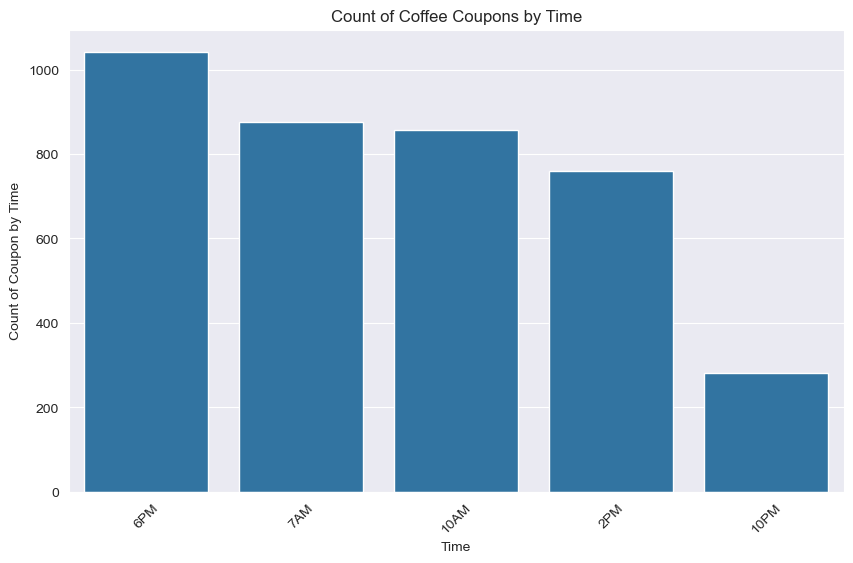

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=coffee_df['time'].value_counts().index,y=coffee_df['time'].value_counts().values)
plt.title('Count of Coffee Coupons by Time')
plt.xlabel('Time')
plt.ylabel('Count of Coupon by Time')
plt.xticks(rotation=45);

In [40]:
seven_am_acceptance_rate = coffee_df.query('time == "7AM" and Y==1')['time'].count() / coffee_df.query('time == "7AM"')['time'].count() * 100
ten_am_acceptance_rate = coffee_df.query('time == "10AM" and Y==1')['time'].count() / coffee_df.query('time == "10AM"')['time'].count() * 100
two_pm_acceptance_rate = coffee_df.query('time == "2PM" and Y==1')['time'].count() / coffee_df.query('time == "2PM"')['time'].count() * 100
six_pm_acceptance_rate = coffee_df.query('time == "6PM" and Y==1')['time'].count() / coffee_df.query('time == "6PM"')['time'].count() * 100
ten_pm_acceptance_rate = coffee_df.query('time == "10PM" and Y==1')['time'].count() / coffee_df.query('time == "10PM"')['time'].count() * 100
print(f'At 7AM, the acceptance rate for coffee coupons is {seven_am_acceptance_rate:.2f}%')
print(f'At 10AM, the acceptance rate for coffee coupons is {ten_am_acceptance_rate:.2f}%')
print(f'At 2PM, the acceptance rate for coffee coupons is {two_pm_acceptance_rate:.2f}%')
print(f'At 6PM, the acceptance rate for coffee coupons is {six_pm_acceptance_rate:.2f}%')
print(f'At 10PM, the acceptance rate for coffee coupons is {ten_pm_acceptance_rate:.2f}%')


At 7AM, the acceptance rate for coffee coupons is 44.00%
At 10AM, the acceptance rate for coffee coupons is 63.48%
At 2PM, the acceptance rate for coffee coupons is 54.55%
At 6PM, the acceptance rate for coffee coupons is 41.23%
At 10PM, the acceptance rate for coffee coupons is 42.91%


It seems evident that the best time to present a customer with a coffee house coupon is mid-morning at 10:00AM, especially when the temperature is 80 degrees or warmer.